1. Greedy and DQN with active transmission packages d_t change from 1 to 9

In [1]:
# Create greedy strategy and dqn comparision csv files when d_t change
import pandas as pd

d_t_range = {'d_t': range(1, 10)}
dt_greedy_dqn_throughput_df = pd.DataFrame(d_t_range)
dt_greedy_dqn_throughput_df.to_csv('csv/dt_greedy_dqn_throughput.csv', index=False)

dt_greedy_dqn_loss_df = pd.DataFrame(d_t_range)
dt_greedy_dqn_loss_df.to_csv('csv/dt_greedy_dqn_loss.csv', index=False)

dt_greedy_dqn_pdr_df = pd.DataFrame(d_t_range)
dt_greedy_dqn_pdr_df.to_csv('csv/dt_greedy_dqn_pdr.csv', index=False)

In [16]:
# Change d_t from 1 to 9
# Run greedy strategy and insert result to file
from jammer_power import *
from simulation.greedy_strategy import GreedyStrategy
import pandas as pd

dt_greedy_dqn_throughput_df = pd.read_csv('csv/dt_greedy_dqn_throughput.csv')
dt_greedy_dqn_loss_df = pd.read_csv('csv/dt_greedy_dqn_loss.csv')
dt_greedy_dqn_pdr_df = pd.read_csv('csv/dt_greedy_dqn_pdr.csv')

dt_greedy_dqn_throughput_df['greedy'] = 0
dt_greedy_dqn_loss_df['greedy'] = 0
dt_greedy_dqn_pdr_df['greedy'] = 0

for i in range(1, 10):
    greedy = GreedyStrategy()
    greedy.set_active_transmit_packages(d_t=i)
    throughput, loss, pdr = greedy.run()

    dt_greedy_dqn_throughput_df.loc[dt_greedy_dqn_throughput_df['d_t'] == i, 'greedy'] = throughput
    dt_greedy_dqn_loss_df.loc[dt_greedy_dqn_loss_df['d_t'] == i, 'greedy'] = loss
    dt_greedy_dqn_pdr_df.loc[dt_greedy_dqn_pdr_df['d_t'] == i, 'greedy'] = pdr
    
# Save result
dt_greedy_dqn_throughput_df.to_csv('csv/dt_greedy_dqn_throughput.csv', index=False)
dt_greedy_dqn_loss_df.to_csv('csv/dt_greedy_dqn_loss.csv', index=False)
dt_greedy_dqn_pdr_df.to_csv('csv/dt_greedy_dqn_pdr.csv', index=False)

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5749
Avg throughput (packages/time unit) = 1.1498
Avg loss (packages/time unit) = 1.8412
PDR = 38.416304710992314%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5775
Avg throughput (packages/time unit) = 1.155
Avg loss (packages/time unit) = 1.8228
PDR = 38.7609906705148%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5682
Avg throughput (packages/time unit) = 1.1364
Avg loss (packages/time unit) = 1.8568
PDR = 37.94577267263256%


/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2314447636.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1498' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dt_greedy_dqn_throughput_df.loc[dt_greedy_dqn_throughput_df['d_t'] == i, 'greedy'] = throughput
/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2314447636.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.8412' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dt_greedy_dqn_loss_df.loc[dt_greedy_dqn_loss_df['d_t'] == i, 'greedy'] = loss
/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2314447636.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Val

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5808
Avg throughput (packages/time unit) = 1.1616
Avg loss (packages/time unit) = 1.8524
PDR = 38.524807641284156%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5802
Avg throughput (packages/time unit) = 1.1604
Avg loss (packages/time unit) = 1.8282
PDR = 38.8015782786063%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5768
Avg throughput (packages/time unit) = 1.1536
Avg loss (packages/time unit) = 1.8454
PDR = 38.440519826724426%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5656
Avg throughput (packages/time unit) = 1.1312
Avg loss (packages/time unit) = 1.8434
PDR = 38.010

In [1]:
# Run dqn and insert result to file
from jammer_power import *
from simulation.ddqn_simulation import DDQNSimulate
import pandas as pd

dt_greedy_dqn_throughput_df = pd.read_csv('csv/dt_greedy_dqn_throughput.csv')
dt_greedy_dqn_loss_df = pd.read_csv('csv/dt_greedy_dqn_loss.csv')
dt_greedy_dqn_pdr_df = pd.read_csv('csv/dt_greedy_dqn_pdr.csv')

dt_greedy_dqn_throughput_df['dqn'] = 0
dt_greedy_dqn_loss_df['dqn'] = 0
dt_greedy_dqn_pdr_df['dqn'] = 0

list_model = [
    'model/dqn_dt_1.keras',
    'model/dqn_dt_2.keras',
    'model/dqn_dt_3.keras',
    'model/dqn_dt_4.keras',
    'model/dqn_dt_5.keras',
    'model/dqn_dt_6.keras',
    'model/dqn_dt_7.keras',
    'model/dqn_dt_8.keras',
    'model/dqn_dt_9.keras',
]

for i in range(0, 9):
    model_file_name = list_model[i]
    dqn_simulate = DDQNSimulate(model=model_file_name)
    dqn_simulate.set_active_transmit_packages(d_t=i+1)
    throughput, loss, pdr = dqn_simulate.run()

    dt_greedy_dqn_throughput_df.loc[dt_greedy_dqn_throughput_df['d_t'] == i + 1, 'dqn'] = throughput
    dt_greedy_dqn_loss_df.loc[dt_greedy_dqn_loss_df['d_t'] == i + 1, 'dqn'] = loss
    dt_greedy_dqn_pdr_df.loc[dt_greedy_dqn_pdr_df['d_t'] == i + 1, 'dqn'] = pdr
    
# Save result
dt_greedy_dqn_throughput_df.to_csv('csv/dt_greedy_dqn_throughput.csv', index=False)
dt_greedy_dqn_loss_df.to_csv('csv/dt_greedy_dqn_loss.csv', index=False)
dt_greedy_dqn_pdr_df.to_csv('csv/dt_greedy_dqn_pdr.csv', index=False)

---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 6992
Number packages sent successfully = 6999
Avg throughput (packages/time unit) = 1.3984
Avg loss (packages/time unit) = 1.6046
PDR = 46.5916655571828%
---------------------------------------------------


C:\Users\dungh\AppData\Local\Temp\ipykernel_17292\2657040723.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dt_greedy_dqn_throughput_df.loc[dt_greedy_dqn_throughput_df['d_t'] == i + 1, 'dqn'] = throughput
C:\Users\dungh\AppData\Local\Temp\ipykernel_17292\2657040723.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6046' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dt_greedy_dqn_loss_df.loc[dt_greedy_dqn_loss_df['d_t'] == i + 1, 'dqn'] = loss
C:\Users\dungh\AppData\Local\Temp\ipykernel_17292\2657040723.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.5916655571828' has dtype incompatibl

---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7103
Number packages sent successfully = 7111
Avg throughput (packages/time unit) = 1.4206
Avg loss (packages/time unit) = 1.6126
PDR = 46.86305522604455%
---------------------------------------------------
---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7118
Number packages sent successfully = 7126
Avg throughput (packages/time unit) = 1.4236
Avg loss (packages/time unit) = 1.583
PDR = 47.37716907120537%
---------------------------------------------------
---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7267
Number packages sent successfully = 7274
Avg throughput (packages/time unit) = 1.4534
Avg loss (packages/time unit) = 1.5758
PDR = 48.00369563782749%
---------------------------------------------------
-----------------------

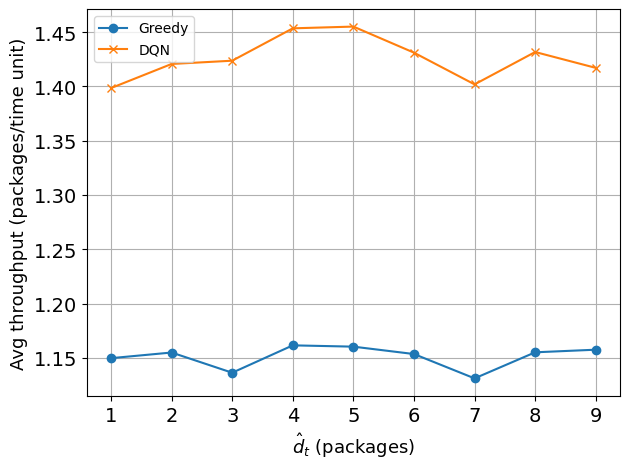

In [15]:
# Plot throughput graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/dt_greedy_dqn_throughput.csv')

plt.plot(df['d_t'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['d_t'], df['dqn'], marker='x', label='DQN')
# plt.title('Throughput comparison between Greedy strategy and DQN')
plt.xlabel(r'$\hat{d}_t$ (packages)', fontsize = 13)
plt.grid(True)
plt.ylabel('Avg throughput (packages/time unit)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend()
plt.show()

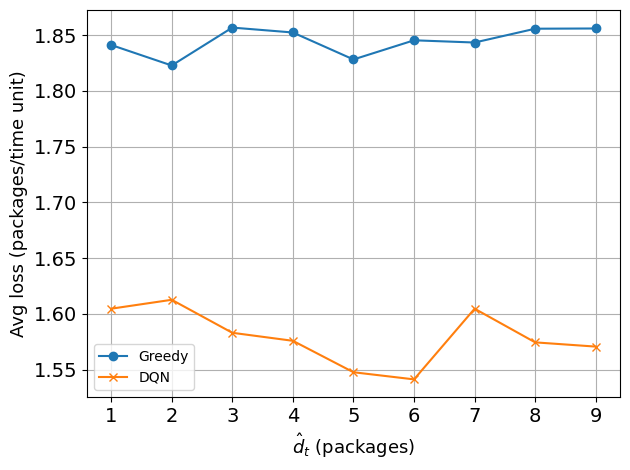

In [14]:
# Plot loss graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/dt_greedy_dqn_loss.csv')

plt.plot(df['d_t'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['d_t'], df['dqn'], marker='x', label='DQN')
# plt.title('Loss packages comparison between Greedy strategy and DQN')
plt.xlabel(r'$\hat{d}_t$ (packages)', fontsize = 13)
plt.grid(True)
plt.ylabel('Avg loss (packages/time unit)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend()
plt.show()

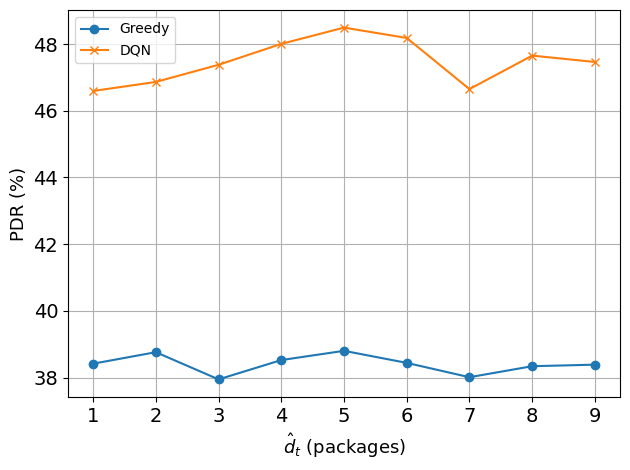

In [13]:
# Plot pdr graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/dt_greedy_dqn_pdr.csv')

plt.plot(df['d_t'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['d_t'], df['dqn'], marker='x', label='DQN')
# plt.title('PDR comparison between Greedy strategy and DQN')
plt.xlabel(r'$\hat{d}_t$ (packages)', fontsize = 13)
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('PDR (%)', fontsize = 13)
plt.tight_layout()
plt.legend()
plt.show()

2. Greedy and DQN with Pavg change from 1W to 9W


In [24]:
# Calculate simulation P_avg
from jammer_power import *

for i in list_nu_p:
    i.calculate_p_avg()

Pavg = 0.9750000000000001
Pavg = 2.0
Pavg = 2.9749999999999996
Pavg = 4.0
Pavg = 4.95
Pavg = 5.949999999999999
Pavg = 7.0
Pavg = 8.075
Pavg = 9.0


In [ ]:
# Create greedy strategy and dqn avg throughput csv file
import pandas as pd

p_avg_range = {'p_avg': range(1, 10)}
p_greedy_dqn_throughput_df = pd.DataFrame(p_avg_range)
p_greedy_dqn_throughput_df.to_csv('csv/p_greedy_dqn_throughput.csv', index=False)

p_greedy_dqn_loss_df = pd.DataFrame(p_avg_range)
p_greedy_dqn_loss_df.to_csv('csv/p_greedy_dqn_loss.csv', index=False)

p_greedy_dqn_pdr_df = pd.DataFrame(p_avg_range)
p_greedy_dqn_pdr_df.to_csv('csv/p_greedy_dqn_pdr.csv', index=False)


In [ ]:
# Run greedy strategy and insert result to file
from jammer_power import *
from simulation.greedy_strategy import GreedyStrategy

p_greedy_dqn_throughput_df = pd.read_csv('csv/p_greedy_dqn_throughput.csv')
p_greedy_dqn_loss_df = pd.read_csv('csv/p_greedy_dqn_loss.csv')
p_greedy_dqn_pdr_df = pd.read_csv('csv/p_greedy_dqn_pdr.csv')

p_greedy_dqn_throughput_df['greedy'] = 0
p_greedy_dqn_loss_df['greedy'] = 0
p_greedy_dqn_pdr_df['greedy'] = 0

for i in range(0, 9):
    power = list_nu_p[i]
    greedy = GreedyStrategy()
    greedy.set_jammer_power(nu=power.nu, nu_p=power.nu_p)
    throughput, loss, pdr = greedy.run()

    p_greedy_dqn_throughput_df.loc[p_greedy_dqn_throughput_df['p_avg'] == i + 1, 'greedy'] = throughput
    p_greedy_dqn_loss_df.loc[p_greedy_dqn_loss_df['p_avg'] == i + 1, 'greedy'] = loss
    p_greedy_dqn_pdr_df.loc[p_greedy_dqn_pdr_df['p_avg'] == i + 1, 'greedy'] = pdr
    
# Save result
p_greedy_dqn_throughput_df.to_csv('csv/p_greedy_dqn_throughput.csv', index=False)
p_greedy_dqn_loss_df.to_csv('csv/p_greedy_dqn_loss.csv', index=False)
p_greedy_dqn_pdr_df.to_csv('csv/p_greedy_dqn_pdr.csv', index=False)

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 784
Avg throughput (packages/time unit) = 0.1568
Avg loss (packages/time unit) = 2.8422
PDR = 5.22492502499167%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 1612
Avg throughput (packages/time unit) = 0.3224
Avg loss (packages/time unit) = 2.6808
PDR = 10.728071343005457%


C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1568' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_throughput_df.loc[greedy_dqn_throughput_df['p_avg'] == i + 1, 'greedy'] = throughput
C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8422' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  greedy_dqn_loss_df.loc[greedy_dqn_loss_df['p_avg'] == i + 1, 'greedy'] = loss
C:\Users\dungh\AppData\Local\Temp\ipykernel_15292\275482722.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.22492502499167' has dtype incompatible wit

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 2432
Avg throughput (packages/time unit) = 0.4864
Avg loss (packages/time unit) = 2.506
PDR = 16.243654822335024%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 3147
Avg throughput (packages/time unit) = 0.6294
Avg loss (packages/time unit) = 2.3694
PDR = 20.97440682484671%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 3996
Avg throughput (packages/time unit) = 0.7992
Avg loss (packages/time unit) = 2.2028
PDR = 26.60452729693742%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 4704
Avg throughput (packages/time unit) = 0.9408
Avg loss (packages/time unit) = 2.012
PDR = 31.84187

In [ ]:
# Run dqn and insert result to file
from jammer_power import *
from simulation.ddqn_simulation import DDQNSimulate
import pandas as pd

p_greedy_dqn_throughput_df = pd.read_csv('csv/p_greedy_dqn_throughput.csv')
p_greedy_dqn_loss_df = pd.read_csv('csv/p_greedy_dqn_loss.csv')
p_greedy_dqn_pdr_df = pd.read_csv('csv/p_greedy_dqn_pdr.csv')

# p_greedy_dqn_throughput_df['dqn'] = 0
# p_greedy_dqn_loss_df['dqn'] = 0
# p_greedy_dqn_pdr_df['dqn'] = 0

list_model = [
    'model/dqn_1W.keras',
    'model/dqn_2W.keras',
    'model/dqn_3W.keras',
    'model/dqn_4W.keras',
    'model/dqn_5W.keras',
    'model/dqn_6W.keras',
    'model/dqn_7W.keras',
    'model/dqn_8W.keras',
    'model/dqn_9W.keras',
]

for i in range(7, 9):
    power = list_nu_p[i]
    model_file_name = list_model[i]
    dqn_simulate = DDQNSimulate(model=model_file_name)
    dqn_simulate.set_jammer_power(nu=power.nu, nu_p=power.nu_p)
    throughput, loss, pdr = dqn_simulate.run()

    p_greedy_dqn_throughput_df.loc[p_greedy_dqn_throughput_df['p_avg'] == i + 1, 'dqn'] = throughput
    p_greedy_dqn_loss_df.loc[p_greedy_dqn_loss_df['p_avg'] == i + 1, 'dqn'] = loss
    p_greedy_dqn_pdr_df.loc[p_greedy_dqn_pdr_df['p_avg'] == i + 1, 'dqn'] = pdr
    
# Save result
p_greedy_dqn_throughput_df.to_csv('csv/p_greedy_dqn_throughput.csv', index=False)
p_greedy_dqn_loss_df.to_csv('csv/p_greedy_dqn_loss.csv', index=False)
p_greedy_dqn_pdr_df.to_csv('csv/p_greedy_dqn_pdr.csv', index=False)

2024-11-20 12:38:23.273607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 8034
Number packages sent successfully = 8036
Avg throughput (packages/time unit) = 1.6068
Avg loss (packages/time unit) = 1.382
PDR = 53.76689415228155%
---------------------------------------------------


2024-11-20 12:40:09.903980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 8802
Number packages sent successfully = 8812
Avg throughput (packages/time unit) = 1.7604
Avg loss (packages/time unit) = 1.2592
PDR = 58.326714323537196%
---------------------------------------------------


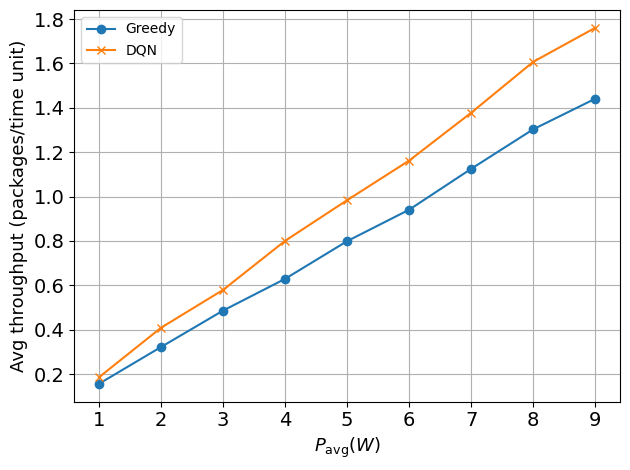

In [12]:
# Plot throughput graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/p_greedy_dqn_throughput.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
# plt.title('Throughput comparison between Greedy strategy and DQN')
plt.xlabel(r'$P_\text{avg} (W)$', fontsize = 13)
plt.ylabel('Avg throughput (packages/time unit)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

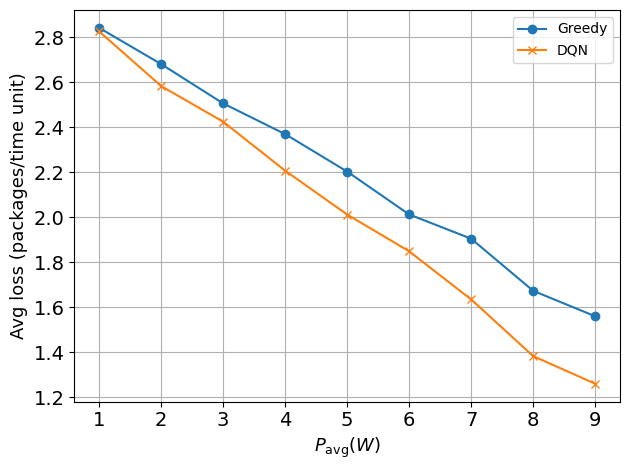

In [11]:
# Plot loss graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/p_greedy_dqn_loss.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
# plt.title('Loss packages comparison between Greedy strategy and DQN')
plt.xlabel(r'$P_\text{avg} (W)$', fontsize = 13)
plt.ylabel('Avg loss (packages/time unit)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

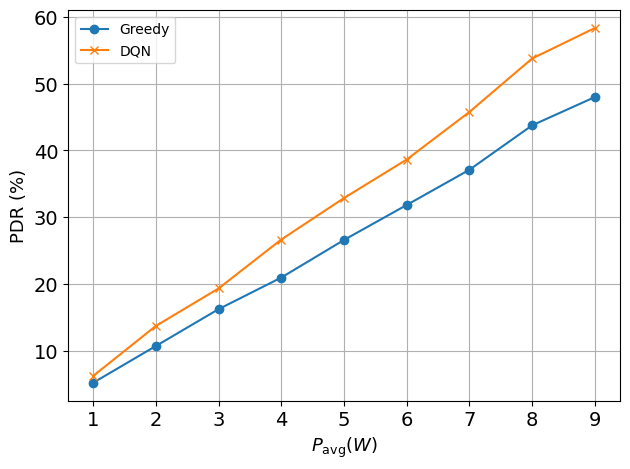

In [10]:
# Plot pdr graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/p_greedy_dqn_pdr.csv')

plt.plot(df['p_avg'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['p_avg'], df['dqn'], marker='x', label='DQN')
# plt.title('PDR comparison between Greedy strategy and DQN')
plt.xlabel(r'$P_\text{avg} (W)$', fontsize = 13)
plt.ylabel('PDR (%)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

3. Greedy strategy with difference harvest energy frequency

In [6]:
# Create greedy strategy and dqn comparision csv files when d_t change
import pandas as pd

hf_range = {'hf': range(2, 11)}
hf_df = pd.DataFrame(hf_range)
hf_df.to_csv('csv/hf_greedy_dqn_throughput.csv', index=False)
hf_df.to_csv('csv/hf_greedy_dqn_loss.csv', index=False)
hf_df.to_csv('csv/hf_greedy_dqn_pdr.csv', index=False)

In [ ]:
# Change harvest energy frequency from 2 to 10
# Run greedy strategy and insert result to file
from jammer_power import *
from simulation.greedy_strategy import GreedyStrategy
import pandas as pd

df1 = pd.read_csv('csv/hf_greedy_dqn_throughput.csv')
df2 = pd.read_csv('csv/hf_greedy_dqn_loss.csv')
df3 = pd.read_csv('csv/hf_greedy_dqn_pdr.csv')

df1['greedy'] = 0
df2['greedy'] = 0
df3['greedy'] = 0

for i in range(2, 11):
    greedy = GreedyStrategy()
    greedy.set_harvest_frequency(harvest_frequency=i)
    throughput, loss, pdr = greedy.run()

    df1.loc[df1['hf'] == i, 'greedy'] = throughput
    df2.loc[df2['hf'] == i, 'greedy'] = loss
    df3.loc[df3['hf'] == i, 'greedy'] = pdr

# Save result
df1.to_csv('csv/hf_greedy_dqn_throughput.csv', index=False)
df2.to_csv('csv/hf_greedy_dqn_loss.csv', index=False)
df3.to_csv('csv/hf_greedy_dqn_pdr.csv', index=False)
    

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 3571
Avg throughput (packages/time unit) = 0.7142
Avg loss (packages/time unit) = 2.278
PDR = 23.852782045287558%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 4823
Avg throughput (packages/time unit) = 0.9646
Avg loss (packages/time unit) = 2.0724
PDR = 31.746972090573987%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5335
Avg throughput (packages/time unit) = 1.067
Avg loss (packages/time unit) = 1.8972
PDR = 35.97195064392152%


/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2077041265.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7142' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['hf'] == i, 'greedy'] = throughput
/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2077041265.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.278' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['hf'] == i, 'greedy'] = loss
/var/folders/90/rpdkk0qx6_s6b5c57ch3jmhr0000gn/T/ipykernel_42453/2077041265.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.852782045287558' has dtype incompatible with int64, please explicitly cast to a 

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5809
Avg throughput (packages/time unit) = 1.1618
Avg loss (packages/time unit) = 1.786
PDR = 39.39373389393734%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5951
Avg throughput (packages/time unit) = 1.1902
Avg loss (packages/time unit) = 1.7876
PDR = 39.94227800523525%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 6117
Avg throughput (packages/time unit) = 1.2234
Avg loss (packages/time unit) = 1.7742
PDR = 40.785438058407784%
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 6350
Avg throughput (packages/time unit) = 1.27
Avg loss (packages/time unit) = 1.7148
PDR = 42.520423

In [8]:
for i in range(2, 11):
    dqn_simulate = DDQNSimulate(model='model/ddqn.keras')
    throughput, loss, pdr = dqn_simulate.run()

    df1.loc[df1['hf'] == i, 'dqn'] = throughput
    df2.loc[df2['hf'] == i, 'dqn'] = loss
    df3.loc[df3['hf'] == i, 'dqn'] = pdr

    # Save result
    df1.to_csv('csv/hf_greedy_dqn_throughput.csv', index=False)
    df2.to_csv('csv/hf_greedy_dqn_loss.csv', index=False)
    df3.to_csv('csv/hf_greedy_dqn_pdr.csv', index=False)



/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:41:38.643359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7145
Number packages sent successfully = 7149
Avg throughput (packages/time unit) = 1.429
Avg loss (packages/time unit) = 1.5944
PDR = 47.278619138945835%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:43:42.076647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7168
Number packages sent successfully = 7178
Avg throughput (packages/time unit) = 1.4336
Avg loss (packages/time unit) = 1.593
PDR = 47.40143960906029%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:45:46.301391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7129
Number packages sent successfully = 7136
Avg throughput (packages/time unit) = 1.4258
Avg loss (packages/time unit) = 1.5662
PDR = 47.678225429277745%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:47:49.453782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7152
Number packages sent successfully = 7161
Avg throughput (packages/time unit) = 1.4304
Avg loss (packages/time unit) = 1.5576
PDR = 47.90286975717439%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:49:54.856402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7111
Number packages sent successfully = 7114
Avg throughput (packages/time unit) = 1.4222
Avg loss (packages/time unit) = 1.583
PDR = 47.33515203939051%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:51:56.128632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7179
Number packages sent successfully = 7183
Avg throughput (packages/time unit) = 1.4358
Avg loss (packages/time unit) = 1.5794
PDR = 47.63262599469496%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:53:57.424053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7150
Number packages sent successfully = 7155
Avg throughput (packages/time unit) = 1.43
Avg loss (packages/time unit) = 1.6004
PDR = 47.20591146005147%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:55:58.626339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7215
Number packages sent successfully = 7223
Avg throughput (packages/time unit) = 1.443
Avg loss (packages/time unit) = 1.5308
PDR = 48.551455266518786%
---------------------------------------------------


/opt/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: dqn is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
2024-11-20 17:58:00.210291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


---------------------------------------------------
Result after running simulation in 5000 time units
Total rewards = 7226
Number packages sent successfully = 7236
Avg throughput (packages/time unit) = 1.4452
Avg loss (packages/time unit) = 1.5444
PDR = 48.375451263537904%
---------------------------------------------------


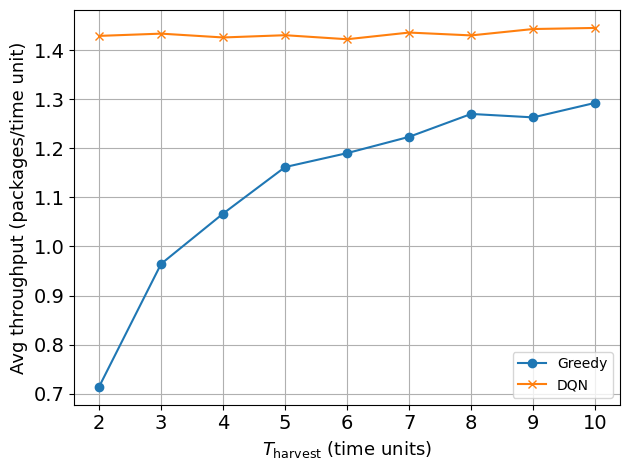

In [7]:
# Plot throughput graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/hf_greedy_dqn_throughput.csv')

plt.plot(df['hf'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['hf'], df['dqn'], marker='x', label='DQN')
# plt.title('Throughput comparison between Greedy strategy and DQN')
plt.xlabel(r'$T_\text{harvest}$ (time units)', fontsize = 13)
plt.ylabel('Avg throughput (packages/time unit)', fontsize = 13)
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend()
plt.show()

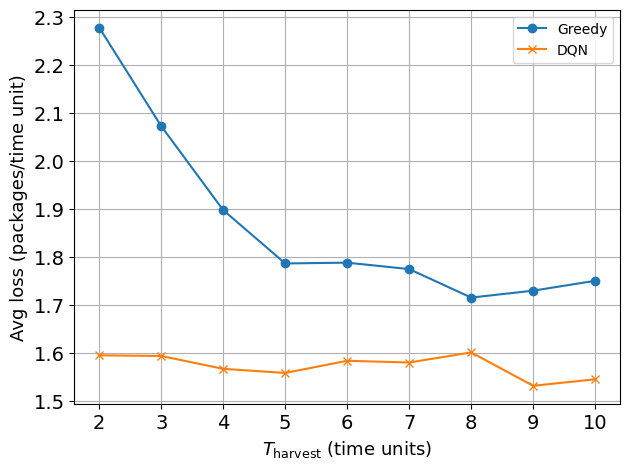

In [8]:
# Plot loss graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/hf_greedy_dqn_loss.csv')

plt.plot(df['hf'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['hf'], df['dqn'], marker='x', label='DQN')
# plt.title('Loss packages comparison between Greedy strategy and DQN')
plt.xlabel(r'$T_\text{harvest}$ (time units)', fontsize = 13)
plt.grid(True)
plt.ylabel('Avg loss (packages/time unit)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend()
plt.show()

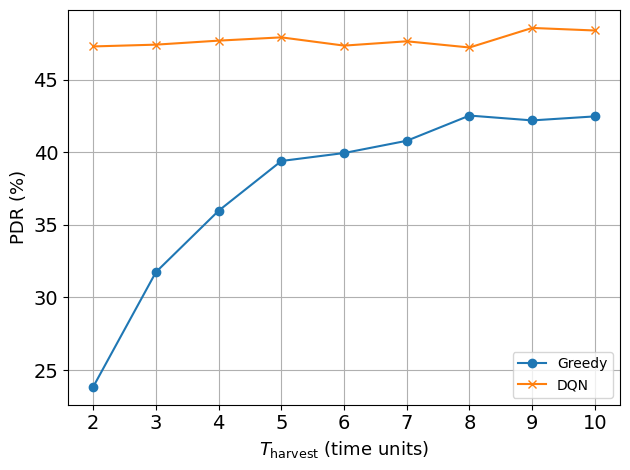

In [9]:
# Plot pdr graph
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('csv/hf_greedy_dqn_pdr.csv')

plt.plot(df['hf'], df['greedy'], marker='o', label='Greedy')
plt.plot(df['hf'], df['dqn'], marker='x', label='DQN')
# plt.title('PDR comparison between Greedy strategy and DQN')
plt.xlabel(r'$T_\text{harvest}$ (time units)', fontsize = 13)
plt.grid(True)
plt.ylabel('PDR (%)', fontsize = 13)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.legend()
plt.show()